<a href="https://colab.research.google.com/github/shradhakoot1/code/blob/main/gold_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [63]:
# loading csv data to data pandas frame
gold_data=pd.read_csv('/content/gld_price_data.csv')


In [64]:
# printing 1st 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


1.The SPX, or the Standard & Poor’s 500 Index, is a stock index that is comprised of the 500 largest U.S. publicly traded companies by market capitalization, or the stock price multiplied by the number of shares it has outstanding. 

2.GLD : gold price

3.USO:United States Oil Fund

4.SLV:Silver Price

5.EUR/USD:currency pair quotation of the Euro against the US

In [65]:
# last 5 data
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [66]:
# number of rows and column
gold_data.shape

(2290, 6)

In [67]:
# some more info 
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [68]:
# checking missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [69]:
# getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation between various colums:

1. 1st type is positive correlation ( directly proptional)


2. 2nd negatively correlated (inversely proportinal)

In [70]:
cor=gold_data.corr()

<AxesSubplot:>

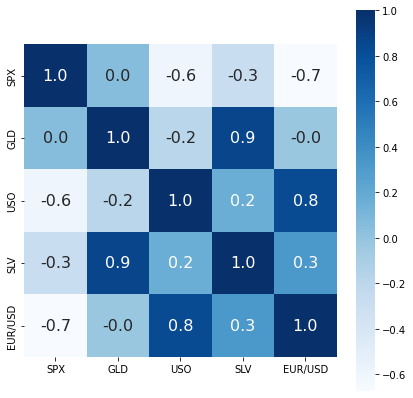

In [71]:
# constructing heamap to understand the correlation
plt.figure(figsize=(7,7))
sns.heatmap(cor,annot=True,square=True,cbar=True,fmt='.1f',annot_kws={'size':16},cmap='Blues')

In [72]:
# correlation of gold:
cor['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


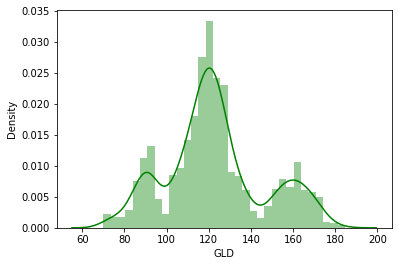

In [73]:
# checking the distribution of gold:
sns.distplot(gold_data['GLD'],color='green')
plt.show()

Splitting the features and target

In [74]:
 x=gold_data.drop(['Date','GLD'],axis=1)
 y=gold_data['GLD']

In [75]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [76]:
y


0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Splitting into training and testing data

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

Model training

In [80]:
 regressor=RandomForestRegressor()

In [82]:
# training the model
regressor.fit(xtrain, ytrain)

RandomForestRegressor()

Model evaluation

In [83]:
# prediction on test data
pred_test_data=regressor.predict(xtest)

In [84]:
pred_test_data

array([168.66529969,  82.00839976, 116.07429998, 127.47120067,
       120.83380116, 154.84569733, 150.51119894, 126.05419996,
       117.42159872, 126.29020017, 116.60090096, 171.26160043,
       141.99519842, 167.84509893, 115.0106999 , 117.76830065,
       139.08240337, 170.35500132, 159.43330269, 160.57249912,
       155.17320018, 125.06860036, 175.41760003, 157.46480349,
       125.09200064,  93.84749992,  77.33199997, 120.29879991,
       119.1377995 , 167.50669949,  88.15420054, 125.29730012,
        91.022001  , 117.79520012, 121.10629916, 136.0034009 ,
       115.71520122, 115.41650071, 147.55790023, 107.11720077,
       104.60120228,  87.25089786, 126.46320056, 117.96630005,
       153.3474988 , 119.60939989, 108.31319973, 107.9753987 ,
        93.11700059, 127.14949788,  74.91180033, 113.60739967,
       121.30560007, 111.2796993 , 118.89129879, 120.74269929,
       159.18390024, 169.00130175, 147.03049697,  86.04589869,
        94.2435003 ,  86.85839889,  90.53560058, 118.88

In [85]:
# R squared error:
error_square=metrics.r2_score(pred_test_data,ytest)

In [87]:
print('R squared error:',error_square)

R squared error: 0.988973448552233


compare actual values and predicted values in plot:

In [88]:
ytest=list(ytest)

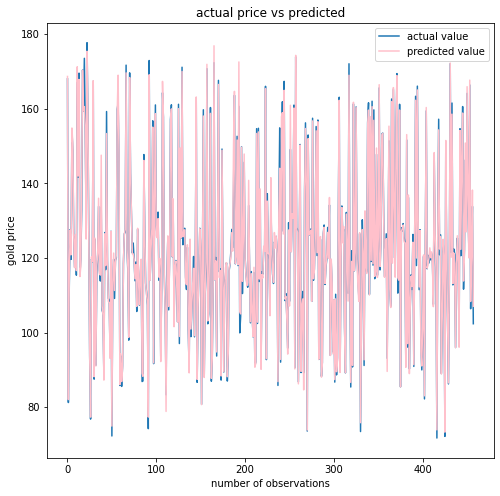

In [102]:
plt.figure(figsize=(8,8))
plt.plot(ytest,label='actual value')
plt.plot(pred_test_data,color='pink',label='predicted value')
plt.xlabel('number of observations')
plt.ylabel('gold price')
plt.title('actual price vs predicted')
plt.legend()
plt.show()


we see from graph that line graph that the two values are a lot similar as the line of actual values and predicted values overlap each other